In [1]:
import numpy as np
from qiskit.algorithms.optimizers.cmaes import CMAES_TellObject
from qiskit.algorithms.optimizers import SteppableCMAES

np.random.seed(12)

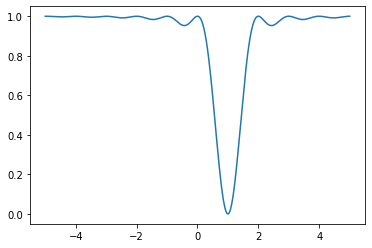

In [2]:
import matplotlib.pyplot as plt
def objective(x):
    return 1-(np.sinc(np.linalg.norm(x - 1)))**2

def objective_norm(x):
    return 1-(np.sinc(x-1))**2
x=np.linspace(-5,5,500)

plt.plot(x,objective_norm(x))




In [4]:
def callback(state):
    print(  f"(Generation:{state.nit} ; sigma:{state.sigma:.4E} ; objective:{state.fun(state.x):.4E} ; nfev:{state.nfev}")
    print(f"x={state.x}")
    print(f"|x|={np.linalg.norm(state.x)}")

N = 5
tol = 1e-5
initial_point = np.random.normal(0, 10, size=(N,))

optimizer = SteppableCMAES(callback=callback,maxiter=5000)
optimizer.initialize(x0=initial_point, fun=objective, tol=tol,population=50)

result = optimizer.minimize(fun=objective, x0=initial_point)
callback(optimizer._state)
result = optimizer.create_result()
print("We get an objective of:",result.fun)
print("At x=",result.x)

(Generation:1 ; sigma:4.4262E-01 ; objective:9.9991E-01 ; nfev:8
x=[-1.61513828  4.5256059  10.27228457 11.43278353  3.56569432]
|x|=16.49340249924398
(Generation:2 ; sigma:4.0922E-01 ; objective:9.9989E-01 ; nfev:16
x=[-1.44153517  4.75117863 10.27720862 11.44800207  3.23135597]
|x|=16.48548306333876
(Generation:3 ; sigma:3.7472E-01 ; objective:9.9989E-01 ; nfev:24
x=[-1.38013573  4.88582701 10.35061784 11.31879752  3.33095421]
|x|=16.49611478928659
(Generation:4 ; sigma:3.9919E-01 ; objective:9.9961E-01 ; nfev:32
x=[-1.41015999  5.33211237 10.16411848 11.03093442  3.22920556]
|x|=16.304556442764575
(Generation:5 ; sigma:4.6633E-01 ; objective:9.9960E-01 ; nfev:40
x=[-1.28965854  5.4762876  10.20396606 10.66822529  2.67542326]
|x|=16.023195336171266
(Generation:6 ; sigma:4.3440E-01 ; objective:9.9952E-01 ; nfev:48
x=[-1.34657856  5.49223448 10.08235903 10.90688868  2.93532765]
|x|=16.161938194498713
(Generation:7 ; sigma:4.1168E-01 ; objective:9.9952E-01 ; nfev:56
x=[-1.26150675  5.64